# Contents of Notebook 

1. Import dataset from r/ROAP 
2. Import datset from r/Borrow 
3. Merge both datasets to form training_set_df 

- use training_set_df for training the ML model 

4. Apply ML model Random Forests
5. Apply ML model Logit 
6. Apply ML model Decision Tree
7. Apply ML model Gradient Boosting 
8. Apply ML model Neural Networks 
-> best model with the highest accuracy is Random Forest

9. import craigstlist dataset 
10. clean craigslist dataset

In [1]:
# Data handling, math, and plotting

import os 
import pickle
import pandas as pd 


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as notebook
import seaborn as sns
import re

# Classical statistical modeling
import statsmodels.formula.api as smf

# ML: Preprocessing
from sklearn import preprocessing

# ML: Train/test splits, cross validation, 
# gridsearch
from sklearn.model_selection import (
    train_test_split, cross_val_score, 
    GridSearchCV)

# ML: Different models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import (
    LogisticRegression)
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier)

from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

# ML: Model evaluation
from sklearn.metrics import (confusion_matrix, 
    classification_report, roc_curve, auc, 
    cohen_kappa_score, make_scorer, f1_score)  

# NLTK for language 
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer


import warnings
warnings.filterwarnings("ignore")

# Import dataset from r/ROAP 

In [2]:
objects = []
with (open("labeled_data.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [3]:
print ()

In [4]:
unpickled_dict = pd.read_pickle("labeled_data.pkl")  
#convert to df
df = pd.DataFrame.from_dict(unpickled_dict)

df = df.transpose()
df.head()

,0,1
t3_17a1qc,"[Hi there, I was supposed to be paid today., S...","[3, 3, 7, 3, 2, 2]"
t3_2e6myo,"[As the title states, I'm working a double tod...","[3, 3, 8, 3, 9, 9]"
t3_3o4qox,[I'm moving out of the apartment I share with ...,"[3, 3, 3, 8, 3, 9]"
t3_9bo3ce,"[Hi all, I'm gonna try and keep this post shor...","[3, 3, 3, 9, 3, 3]"
t3_1hpzqs,"[Sitting on negative 240$ in my bank account.,...","[3, 3, 3, 2, 3, 9]"


In [5]:
print(unpickled_dict)

{'t3_17a1qc': [['Hi there, I was supposed to be paid today.', 'Sadly I am still waiting.', 'I spent my last £2 on cat food so I am absolutely dying here.', 'Not only has this ruined my plans for the weekend, but I am facing an involuntary fast.', 'I am a writer and I am happy to do some writing work for you if you need that.', 'As soon as I get paid, I promise to come straight back here and buy TWO pizzas for two different hungry people.'], [3, 3, 7, 3, 2, 2]], 't3_2e6myo': [["As the title states, I'm working a double today, and don't have any money, nor the time to get lunch to get me through the night.", "I work front desk at a hotel, and with it being Thursday, we're rather slow today, so today would be the only day I can get time to eat.", 'Some food would be absolutely wonderful, and the good part is that I would be able to pay back the favor tomorrow after 3PM est!', 'I live in North Carolina.', 'Thank you for your time!', "Happy pizza'in!"], [3, 3, 8, 3, 9, 9]], 't3_3o4qox': [["

In [6]:
#clean up the data and put each sentence in its own cell. 
#In the cell next to it, put the code for the persuasion technique
#for each row
#column 0 split by ","
#same index as column 1



#[t3_17a1qc, column0[0], column1[0]]
#[t3_17a1qc, column0[1], column1[1]]

#print(unpickled_dict)
final_answer = []
for key, values in unpickled_dict.items():
    title = key
    list_of_sentences = values[0]
    list_of_answers =values[1]
#     print(title)
#     print(list_of_sentences)
    for i in range(len(list_of_sentences)):
        current_sentence = list_of_sentences[i]
        current_answer = list_of_answers[i]
        answer_list = [title,current_sentence,current_answer]
        final_answer.append(answer_list)
        
#convert list to dataframe        
ROAP_transposed_df = pd.DataFrame(final_answer)
        
        

In [7]:
ROAP_transposed_df.head()

,0,1,2
0,t3_17a1qc,"Hi there, I was supposed to be paid today.",3
1,t3_17a1qc,Sadly I am still waiting.,3
2,t3_17a1qc,I spent my last £2 on cat food so I am absolut...,7
3,t3_17a1qc,Not only has this ruined my plans for the week...,3
4,t3_17a1qc,I am a writer and I am happy to do some writin...,2


In [8]:
# adding column name to the respective columns
ROAP_transposed_df.columns =['name','sentence', 'code']
  
ROAP_transposed_df

,name,sentence,code
0,t3_17a1qc,"Hi there, I was supposed to be paid today.",3
1,t3_17a1qc,Sadly I am still waiting.,3
2,t3_17a1qc,I spent my last £2 on cat food so I am absolut...,7
3,t3_17a1qc,Not only has this ruined my plans for the week...,3
4,t3_17a1qc,I am a writer and I am happy to do some writin...,2
...,...,...,...
3595,t3_9nvz59,I don't know what to say.,3
3596,t3_9nvz59,Honestly it's been a really rough few months.,3
3597,t3_9nvz59,I don't have friends and just been really down.,7
3598,t3_9nvz59,I will pay back someone next week.,2


In [9]:
#df.to_csv('transposed_ROAP.csv', index=False)

roap_df = documents
ROAP_cleaned_df = pd.DataFrame(documents)

# Import r/Borrow

In [10]:
#import r/borrow dataset
objects = []
with (open("borrow_labeled_data.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [11]:
print ()

In [12]:
unpickled_dict = pd.read_pickle("borrow_labeled_data.pkl")  
#convert to df
df = pd.DataFrame.from_dict(unpickled_dict)

df = df.transpose()
df.head()

,0,1
t3_9oe5d9,[Long story short: I messed up on a dental pro...,"[3, 3, 2, 3, 0]"
t3_9wpobn,[I am in the middle of a land sale which will ...,"[3, 3, 3, 3, 1]"
t3_4cwz66,[The opening date of the bar that I am the bar...,"[3, 3, 3, 3, 2]"
t3_7ic1k0,"[Hello, \n\nI've had great success here and yo...","[3, 8, 3, 9, 2]"
t3_52538d,"[Hi Ali,\n\nIt's your favorite borrower back a...","[6, 8, 3, 1, 9]"


In [13]:
#for each row
#column 0 split by ","
#same index as column 1



#[t3_17a1qc, column0[0], column1[0]]
#[t3_17a1qc, column0[1], column1[1]]

#print(unpickled_dict)
final_answer = []
for key, values in unpickled_dict.items():
    title = key
    list_of_sentences = values[0]
    list_of_answers =values[1]
#     print(title)
#     print(list_of_sentences)
    for i in range(len(list_of_sentences)):
        current_sentence = list_of_sentences[i]
        current_answer = list_of_answers[i]
        answer_list = [title,current_sentence,current_answer]
        final_answer.append(answer_list)
        
#convert list to dataframe        
borrow_transposed_df = pd.DataFrame(final_answer)

In [14]:
borrow_transposed_df.head()

,0,1,2
0,t3_9oe5d9,Long story short: I messed up on a dental proc...,3
1,t3_9oe5d9,Luckily I have some savings that can help cove...,3
2,t3_9oe5d9,I can add in an additional $150 in interest.,2
3,t3_9oe5d9,I can also make monthly payments.,3
4,t3_9oe5d9,Whichever is best for you.,0


In [15]:
# adding column name to the respective columns
borrow_transposed_df.columns =['name','sentence', 'code']
  
borrow_transposed_df

,name,sentence,code
0,t3_9oe5d9,Long story short: I messed up on a dental proc...,3
1,t3_9oe5d9,Luckily I have some savings that can help cove...,3
2,t3_9oe5d9,I can add in an additional $150 in interest.,2
3,t3_9oe5d9,I can also make monthly payments.,3
4,t3_9oe5d9,Whichever is best for you.,0
...,...,...,...
5795,t3_anoefk,I can provide any documentation you need.,3
5796,t3_4njyfp,As prearranged with /u/kingkaizersauce,0
5797,t3_88km07,Need some lunch money for the next 2 weeks.,3
5798,t3_84lv5a,"£20 loan, repaying £25 in 8 days time.",2


# Merge the dataframes

In [16]:
frames= [ROAP_transposed_df,borrow_transposed_df]
result = pd.concat(frames, ignore_index=True)

In [17]:
print(result)

           name                                           sentence  code
0     t3_17a1qc         Hi there, I was supposed to be paid today.     3
1     t3_17a1qc                          Sadly I am still waiting.     3
2     t3_17a1qc  I spent my last £2 on cat food so I am absolut...     7
3     t3_17a1qc  Not only has this ruined my plans for the week...     3
4     t3_17a1qc  I am a writer and I am happy to do some writin...     2
...         ...                                                ...   ...
9395  t3_anoefk          I can provide any documentation you need.     3
9396  t3_4njyfp             As prearranged with /u/kingkaizersauce     0
9397  t3_88km07        Need some lunch money for the next 2 weeks.     3
9398  t3_84lv5a            £20 loan, repaying £25 in 8 days  time.     2
9399  t3_a0bv3e                  Pre-Arranged with u/sisternancy94     0

[9400 rows x 3 columns]


In [18]:
training_set_df = pd.DataFrame(result)

In [19]:
training_set_df.head()

,name,sentence,code
0,t3_17a1qc,"Hi there, I was supposed to be paid today.",3
1,t3_17a1qc,Sadly I am still waiting.,3
2,t3_17a1qc,I spent my last £2 on cat food so I am absolut...,7
3,t3_17a1qc,Not only has this ruined my plans for the week...,3
4,t3_17a1qc,I am a writer and I am happy to do some writin...,2


In [20]:
training_set_df

,name,sentence,code
0,t3_17a1qc,"Hi there, I was supposed to be paid today.",3
1,t3_17a1qc,Sadly I am still waiting.,3
2,t3_17a1qc,I spent my last £2 on cat food so I am absolut...,7
3,t3_17a1qc,Not only has this ruined my plans for the week...,3
4,t3_17a1qc,I am a writer and I am happy to do some writin...,2
...,...,...,...
9395,t3_anoefk,I can provide any documentation you need.,3
9396,t3_4njyfp,As prearranged with /u/kingkaizersauce,0
9397,t3_88km07,Need some lunch money for the next 2 weeks.,3
9398,t3_84lv5a,"£20 loan, repaying £25 in 8 days time.",2


In [21]:
training_set_df.to_csv('training.csv', index=False)

In [22]:
training_set_df['code'].value_counts()

3    4689
9    1456
2    1262
8     785
1     500
0     413
7     155
5     117
6      17
4       6
Name: code, dtype: int64

<AxesSubplot:>

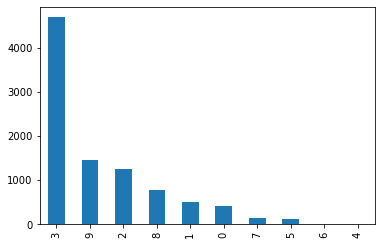

In [23]:
training_set_df['code'].value_counts().plot(kind='bar')

In [24]:
plt.savefig('books_read.png')

<Figure size 432x288 with 0 Axes>

In [25]:
X, y = training_set_df.sentence, training_set_df.code

In [26]:
print(X)

0              Hi there, I was supposed to be paid today.
1                               Sadly I am still waiting.
2       I spent my last £2 on cat food so I am absolut...
3       Not only has this ruined my plans for the week...
4       I am a writer and I am happy to do some writin...
                              ...                        
9395            I can provide any documentation you need.
9396               As prearranged with /u/kingkaizersauce
9397          Need some lunch money for the next 2 weeks.
9398              £20 loan, repaying £25 in 8 days  time.
9399                    Pre-Arranged with u/sisternancy94
Name: sentence, Length: 9400, dtype: object


In [27]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [28]:
X.shape

(9400,)

In [29]:
y.shape

(9400,)

# Apply ML model random forests 

In [30]:
from sklearn.feature_selection import SelectFromModel

In [31]:
#convert the words into vectors for ML model 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [32]:
X.shape

(9400, 1500)

In [33]:
feature_names = vectorizer.get_feature_names()
print(feature_names)

['00', '000', '01', '02', '04', '06', '07', '08', '09', '10', '100', '1000', '10th', '11', '110', '115', '11th', '12', '120', '1200', '125', '12th', '13', '130', '135', '13th', '14', '140', '1400', '14th', '15', '150', '1500', '15th', '16', '160', '16th', '17', '170', '175', '17th', '18', '180', '18th', '19', '19th', '1st', '20', '200', '2000', '2015', '2016', '2017', '2018', '2019', '20th', '21', '210', '21st', '22', '220', '225', '22nd', '23', '230', '23rd', '24', '240', '24th', '25', '250', '25th', '26', '260', '26th', '27', '275', '27th', '28', '28th', '29', '29th', '2nd', '30', '300', '30th', '31', '31st', '320', '330', '35', '350', '360', '3rd', '40', '400', '425', '45', '450', '4th', '50', '500', '55', '550', '5th', '60', '600', '65', '650', '6th', '70', '700', '75', '750', '7th', '80', '800', '85', '8th', '90', '900', '99', '9th', '_cup_', 'ability', 'able', 'absolute', 'absolutely', 'accept', 'accepted', 'access', 'accident', 'accidentally', 'account', 'across', 'act', 'active

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [35]:
######################################################################
#### SPLIT TWICE! Here we create TRAIN | VALIDATION | TEST  #########
####################################################################
from sklearn.model_selection import train_test_split

# 70% of data is training data, set aside other 30%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=101)

# Remaining 30% is split into evaluation and test sets
# Each is 15% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [36]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

In [37]:
from sklearn import ensemble
RF_model = ensemble.RandomForestClassifier(random_state=1)

RF_model.fit(X_train,y_train)
pred = RF_model.predict(X_test)
cm = confusion_matrix(y_test,pred)
RF_acc = (cm[0,0]+cm[1,1])/(sum(sum(cm)))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[ 45   1   2  17   0   0   0   0   0   1]
 [  2  51   3  26   0   0   0   0   0   2]
 [  0   3 149  41   0   0   0   0   1   2]
 [ 14   9  21 627   0   1   0   2   7  18]
 [  0   0   0   1   0   0   0   0   0   0]
 [  0   0   0  13   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0]
 [  0   0   1  12   0   0   0   1   0   1]
 [  0   1   5  65   0   0   0   0  32   0]
 [  4   1   3  20   0   0   0   0   0 204]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69        66
           1       0.77      0.61      0.68        84
           2       0.81      0.76      0.78       196
           3       0.76      0.90      0.82       699
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         1
           7       0.33      0.07      0.11        15
           8       0.80      0.31      0.45       103
           9       0.89     

In [41]:
#Create a series with feature importances:
featimp = pd.Series(RF_model.feature_importances_, index = feature_names).sort_values(ascending=False)
print (featimp)

thanks       6.467872e-02
thank        4.861594e-02
repay        2.270399e-02
interest     2.167738e-02
need         1.957631e-02
                 ...     
pepperoni    2.274908e-08
round        2.126973e-08
suggested    6.406810e-09
rental       0.000000e+00
struggle     0.000000e+00
Length: 1500, dtype: float64


In [42]:
with open('text_classifier', 'wb') as picklefile:
    pickle.dump(classifier,picklefile)

In [43]:
with open('text_classifier', 'rb') as training_model:
    model = pickle.load(training_model)

In [44]:
y_pred2 = model.predict(X_test)

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

[[ 45   1   2  17   0   0   0   0   0   1]
 [  2  51   3  26   0   0   0   0   0   2]
 [  0   3 149  41   0   0   0   0   1   2]
 [ 14   9  21 627   0   1   0   2   7  18]
 [  0   0   0   1   0   0   0   0   0   0]
 [  0   0   0  13   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0]
 [  0   0   1  12   0   0   0   1   0   1]
 [  0   1   5  65   0   0   0   0  32   0]
 [  4   1   3  20   0   0   0   0   0 204]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69        66
           1       0.77      0.61      0.68        84
           2       0.81      0.76      0.78       196
           3       0.76      0.90      0.82       699
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         1
           7       0.33      0.07      0.11        15
           8       0.80      0.31      0.45       103
           9       0.89     

# Apply ML Logit model  

In [45]:
#use logit model 
#convert the words into vectors for ML model 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [47]:
from sklearn import linear_model

log_model = linear_model.LogisticRegression(random_state=1)
log_model.fit(X_train,y_train)
pred = log_model.predict(X_test)
cm = confusion_matrix(y_test,pred)
log_acc = (cm[0,0]+cm[1,1])/(sum(sum(cm)))

In [48]:
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train, y_train) 

LogisticRegression(random_state=1)

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[ 32   3   6  23   0   0   0   0   0   2]
 [  0  45   4  31   0   0   0   0   3   1]
 [  2   8 128  39   0   2   0   2  12   3]
 [ 28  18  50 480   0  14   2  15  48  44]
 [  0   0   0   1   0   0   0   0   0   0]
 [  1   2   1   7   0   0   0   0   2   0]
 [  0   0   0   1   0   0   0   0   0   0]
 [  0   0   2   6   0   0   0   4   1   2]
 [  1   2   5  40   0   1   0   0  50   4]
 [  3   1   7  29   0   0   0   1   5 186]]
              precision    recall  f1-score   support

           0       0.48      0.48      0.48        66
           1       0.57      0.54      0.55        84
           2       0.63      0.65      0.64       196
           3       0.73      0.69      0.71       699
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         1
           7       0.18      0.27      0.22        15
           8       0.41      0.49      0.45       103
           9       0.77     

# Apply ML Decision tree model

In [51]:
#use decisiontree model 
#convert the words into vectors for ML model 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [53]:
from sklearn import tree
DT_model = tree.DecisionTreeClassifier(random_state=1)

DT_model.fit(X_train,y_train)
pred = DT_model.predict(X_test)
cm = confusion_matrix(y_test,pred)
DT_acc = (cm[0,0]+cm[1,1])/(sum(sum(cm)))

In [54]:
classifier = tree.DecisionTreeClassifier(random_state=1)
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=1)

In [55]:
y_pred3 = classifier.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print(accuracy_score(y_test, y_pred3))


[[ 46   3   2  14   0   0   0   0   1   0]
 [  2  45   6  23   0   0   0   1   1   6]
 [  7   6 129  45   0   0   0   0   6   3]
 [ 48  30  39 478   0   8   0  14  51  31]
 [  0   0   0   0   0   0   0   0   0   1]
 [  2   0   1   8   0   1   0   0   0   1]
 [  0   0   0   1   0   0   0   0   0   0]
 [  1   0   1   8   0   0   0   4   0   1]
 [  1   3   7  41   0   1   0   0  45   5]
 [  3   2   1  20   0   0   1   0   2 203]]
              precision    recall  f1-score   support

           0       0.42      0.70      0.52        66
           1       0.51      0.54      0.52        84
           2       0.69      0.66      0.68       196
           3       0.75      0.68      0.72       699
           4       0.00      0.00      0.00         1
           5       0.10      0.08      0.09        13
           6       0.00      0.00      0.00         1
           7       0.21      0.27      0.24        15
           8       0.42      0.44      0.43       103
           9       0.81     

# Apply ML Gradient Boosting model 

In [57]:
#convert the words into vectors for ML model 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [58]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [59]:
GB_model = ensemble.GradientBoostingClassifier(random_state=1)

GB_model.fit(X_train,y_train)
pred = GB_model.predict(X_test)
cm = confusion_matrix(y_test,pred)
GB_acc = (cm[0,0]+cm[1,1])/(sum(sum(cm)))

In [60]:
classifier = ensemble.GradientBoostingClassifier(random_state=1)
classifier.fit(X_train, y_train) 

GradientBoostingClassifier(random_state=1)

In [61]:
y_pred4 = classifier.predict(X_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
print(accuracy_score(y_test, y_pred4))


[[ 25   1   2  37   0   0   0   0   0   1]
 [  0  47   5  31   0   0   0   0   0   1]
 [  2   4 138  48   0   1   0   0   1   2]
 [  2  12  22 622   1   4   2  12   8  14]
 [  0   0   0   1   0   0   0   0   0   0]
 [  0   0   0  11   0   0   0   0   1   1]
 [  0   0   0   1   0   0   0   0   0   0]
 [  0   0   1  10   0   0   0   3   0   1]
 [  0   1   5  52   0   1   0   4  40   0]
 [  2   2   1  27   0   0   1   0   0 199]]
              precision    recall  f1-score   support

           0       0.81      0.38      0.52        66
           1       0.70      0.56      0.62        84
           2       0.79      0.70      0.75       196
           3       0.74      0.89      0.81       699
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         1
           7       0.16      0.20      0.18        15
           8       0.80      0.39      0.52       103
           9       0.91     

# Apply ML Neural Network model


In [63]:
#convert the words into vectors for ML model 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [64]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [65]:
from sklearn import neural_network

NN_model = neural_network.MLPClassifier(random_state=1)
NN_model.fit(X_train,y_train)
pred = NN_model.predict(X_test)
cm = confusion_matrix(y_test,pred)
NN_acc = (cm[0,0]+cm[1,1])/(sum(sum(cm)))

In [66]:
classifier = neural_network.MLPClassifier(random_state=1, hidden_layer_sizes= (512,256))
classifier.fit(X_train, y_train) 

MLPClassifier(hidden_layer_sizes=(512, 256), random_state=1)

#alternative model that i tried 
#did not yield better results 
classifier = neural_network.MLPClassifier(random_state=1, hidden_layer_sizes= (512,256),solver = 'adam', activation = 'relu', 
                                         learning_rate_init = 0.01, learning_rate = 'adaptive')
classifier.fit(X_train, y_train) 

In [67]:
y_pred5 = classifier.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))
print(accuracy_score(y_test, y_pred5))

[[ 44   2   2  18   0   0   0   0   0   0]
 [  1  46   2  32   0   0   0   0   2   1]
 [  4   4 142  39   0   1   0   0   4   2]
 [ 21   9  28 580   0   4   1  10  25  21]
 [  0   0   0   1   0   0   0   0   0   0]
 [  1   0   0  10   0   1   0   0   1   0]
 [  0   0   0   1   0   0   0   0   0   0]
 [  0   0   1   9   0   0   0   3   0   2]
 [  1   1   6  56   0   0   0   0  39   0]
 [  4   1   6  28   0   0   0   1   2 190]]
              precision    recall  f1-score   support

           0       0.58      0.67      0.62        66
           1       0.73      0.55      0.63        84
           2       0.76      0.72      0.74       196
           3       0.75      0.83      0.79       699
           4       0.00      0.00      0.00         1
           5       0.17      0.08      0.11        13
           6       0.00      0.00      0.00         1
           7       0.21      0.20      0.21        15
           8       0.53      0.38      0.44       103
           9       0.88     

# Clean Craigslist Data // Import .csv

In [69]:
df = pd.read_csv('/Users/caleb/Desktop/Y4S1 /UROP /craigslist dataset/kokil/craigslist_total_clean.csv')
print(df)

       Unnamed: 0   action    start_time  \
0               0  message  1.496341e+09   
1               1  message  1.496341e+09   
2               2  message  1.496341e+09   
3               3  message  1.496341e+09   
4               4  message  1.496341e+09   
...           ...      ...           ...   
58931       58931  message  1.500429e+09   
58932       58932  message  1.500429e+09   
58933       58933  message  1.500429e+09   
58934       58934    offer           NaN   
58935       58935   accept           NaN   

                                                    data  agent          time  \
0      Hi, not sure if the charger would work for my ...      0  1.496341e+09   
1      It will work, i have never seen a car without ...      1  1.496341e+09   
2       Still, can I buy it for $5? I'm on a tight budge      0  1.496341e+09   
3           I think the lowest I would want to go is 8.       1  1.496341e+09   
4      How about $6 and I pick it up myself? It'll sa...      0  1

In [70]:
craigslist_total_clean_df = df

In [71]:
craigslist_total_clean_df

,Unnamed: 0,action,start_time,data,agent,time,uuid,scenario,scenario_uuid,agents,outcome
0,0,message,1.496341e+09,"Hi, not sure if the charger would work for my ...",0,1.496341e+09,C_fe3d143826f44a8db1072188f5345e8a,"{'category': 'phone', 'uuid': 'S_6Bcls3VtniHs9...",S_q0qenRCWLQ6vOMOq,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 7.0, 'sides':..."
1,1,message,1.496341e+09,"It will work, i have never seen a car without ...",1,1.496341e+09,C_fe3d143826f44a8db1072188f5345e8a,"{'category': 'phone', 'uuid': 'S_6Bcls3VtniHs9...",S_q0qenRCWLQ6vOMOq,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 7.0, 'sides':..."
2,2,message,1.496341e+09,"Still, can I buy it for $5? I'm on a tight budge",0,1.496341e+09,C_fe3d143826f44a8db1072188f5345e8a,"{'category': 'phone', 'uuid': 'S_6Bcls3VtniHs9...",S_q0qenRCWLQ6vOMOq,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 7.0, 'sides':..."
3,3,message,1.496341e+09,I think the lowest I would want to go is 8.,1,1.496341e+09,C_fe3d143826f44a8db1072188f5345e8a,"{'category': 'phone', 'uuid': 'S_6Bcls3VtniHs9...",S_q0qenRCWLQ6vOMOq,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 7.0, 'sides':..."
4,4,message,1.496341e+09,How about $6 and I pick it up myself? It'll sa...,0,1.496341e+09,C_fe3d143826f44a8db1072188f5345e8a,"{'category': 'phone', 'uuid': 'S_6Bcls3VtniHs9...",S_q0qenRCWLQ6vOMOq,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 7.0, 'sides':..."
...,...,...,...,...,...,...,...,...,...,...,...
58931,58931,message,1.500429e+09,They have been cleaned. They are in good shape...,1,1.500429e+09,C_824ca40ba2424c618a45c64c00f5c296,"{'category': 'car', 'uuid': 'S_BOn8EaSWj0U0r3s...",S_MNkMhsUJfaC2gKnI,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 15000.0, 'sid..."
58932,58932,message,1.500429e+09,Ok well how about 45 for them and I can pick t...,0,1.500429e+09,C_824ca40ba2424c618a45c64c00f5c296,"{'category': 'car', 'uuid': 'S_BOn8EaSWj0U0r3s...",S_MNkMhsUJfaC2gKnI,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 15000.0, 'sid..."
58933,58933,message,1.500429e+09,45 seems fair. Could you bring cash? That woul...,1,1.500429e+09,C_824ca40ba2424c618a45c64c00f5c296,"{'category': 'car', 'uuid': 'S_BOn8EaSWj0U0r3s...",S_MNkMhsUJfaC2gKnI,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 15000.0, 'sid..."
58934,58934,offer,NaN,"{'price': 45.0, 'sides': ''}",1,1.500429e+09,C_824ca40ba2424c618a45c64c00f5c296,"{'category': 'car', 'uuid': 'S_BOn8EaSWj0U0r3s...",S_MNkMhsUJfaC2gKnI,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 15000.0, 'sid..."


In [72]:
X = craigslist_total_clean_df.data

In [73]:
X.info

<bound method Series.info of 0        Hi, not sure if the charger would work for my ...
1        It will work, i have never seen a car without ...
2         Still, can I buy it for $5? I'm on a tight budge
3             I think the lowest I would want to go is 8. 
4        How about $6 and I pick it up myself? It'll sa...
                               ...                        
58931    They have been cleaned. They are in good shape...
58932    Ok well how about 45 for them and I can pick t...
58933    45 seems fair. Could you bring cash? That woul...
58934                         {'price': 45.0, 'sides': ''}
58935                                                  NaN
Name: data, Length: 58936, dtype: object>

In [74]:
craigslist_total_clean_df['code'] = ''

In [75]:
#Y = craigslist_dev_clean_df.code

In [76]:
print(X[0])

Hi, not sure if the charger would work for my car. Can you sell it to me for $5?


In [77]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    #print(X[sen])
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    #document = (X[sen])
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [78]:
print(documents)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [79]:
#convert the words into vectors for ML model 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=3, max_df=0.7, stop_words=stopwords.words('english'))

In [80]:
with open('text_classifier', 'rb') as training_model:
    model = pickle.load(training_model)

In [83]:
X_test = vectorizer.fitransform(documents).toarray()

In [84]:
#y_pred_technique = model.predict(X_test)
y_pred = classifier.predict(X_test)
y_pred

array([8, 8, 3, ..., 3, 3, 3])

In [85]:
print(y_pred)

[8 8 3 ... 3 3 3]


In [86]:
y_pred.shape

(58936,)

In [87]:
predictions_df = pd.DataFrame(y_pred)

In [88]:
# adding column name to the respective columns
predictions_df.columns =['code']

In [89]:
df_out = pd.merge(craigslist_total_clean_df,predictions_df[['code']],how = 'right',left_index = True, right_index = True)

In [90]:
df_out

,Unnamed: 0,action,start_time,data,agent,time,uuid,scenario,scenario_uuid,agents,outcome,code_x,code_y
0,0,message,1.496341e+09,"Hi, not sure if the charger would work for my ...",0,1.496341e+09,C_fe3d143826f44a8db1072188f5345e8a,"{'category': 'phone', 'uuid': 'S_6Bcls3VtniHs9...",S_q0qenRCWLQ6vOMOq,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 7.0, 'sides':...",,8
1,1,message,1.496341e+09,"It will work, i have never seen a car without ...",1,1.496341e+09,C_fe3d143826f44a8db1072188f5345e8a,"{'category': 'phone', 'uuid': 'S_6Bcls3VtniHs9...",S_q0qenRCWLQ6vOMOq,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 7.0, 'sides':...",,8
2,2,message,1.496341e+09,"Still, can I buy it for $5? I'm on a tight budge",0,1.496341e+09,C_fe3d143826f44a8db1072188f5345e8a,"{'category': 'phone', 'uuid': 'S_6Bcls3VtniHs9...",S_q0qenRCWLQ6vOMOq,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 7.0, 'sides':...",,3
3,3,message,1.496341e+09,I think the lowest I would want to go is 8.,1,1.496341e+09,C_fe3d143826f44a8db1072188f5345e8a,"{'category': 'phone', 'uuid': 'S_6Bcls3VtniHs9...",S_q0qenRCWLQ6vOMOq,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 7.0, 'sides':...",,3
4,4,message,1.496341e+09,How about $6 and I pick it up myself? It'll sa...,0,1.496341e+09,C_fe3d143826f44a8db1072188f5345e8a,"{'category': 'phone', 'uuid': 'S_6Bcls3VtniHs9...",S_q0qenRCWLQ6vOMOq,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 7.0, 'sides':...",,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58931,58931,message,1.500429e+09,They have been cleaned. They are in good shape...,1,1.500429e+09,C_824ca40ba2424c618a45c64c00f5c296,"{'category': 'car', 'uuid': 'S_BOn8EaSWj0U0r3s...",S_MNkMhsUJfaC2gKnI,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 15000.0, 'sid...",,3
58932,58932,message,1.500429e+09,Ok well how about 45 for them and I can pick t...,0,1.500429e+09,C_824ca40ba2424c618a45c64c00f5c296,"{'category': 'car', 'uuid': 'S_BOn8EaSWj0U0r3s...",S_MNkMhsUJfaC2gKnI,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 15000.0, 'sid...",,3
58933,58933,message,1.500429e+09,45 seems fair. Could you bring cash? That woul...,1,1.500429e+09,C_824ca40ba2424c618a45c64c00f5c296,"{'category': 'car', 'uuid': 'S_BOn8EaSWj0U0r3s...",S_MNkMhsUJfaC2gKnI,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 15000.0, 'sid...",,3
58934,58934,offer,NaN,"{'price': 45.0, 'sides': ''}",1,1.500429e+09,C_824ca40ba2424c618a45c64c00f5c296,"{'category': 'car', 'uuid': 'S_BOn8EaSWj0U0r3s...",S_MNkMhsUJfaC2gKnI,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 15000.0, 'sid...",,3


In [91]:
predictions_df.to_csv('predictions.csv', index=False)

# Analysis on results 


In [92]:
predictions_df = pd.read_csv('/Users/caleb/Desktop/Y4S1 /UROP /code /ROAP ML /results.csv')
print(predictions_df)

       Unnamed: 0   action    start_time  \
0               9  message  1.496341e+09   
1              10  message  1.496341e+09   
2              11  message  1.496341e+09   
3              12  message  1.496341e+09   
4              13  message  1.496341e+09   
...           ...      ...           ...   
47509       58929  message  1.500428e+09   
47510       58930  message  1.500429e+09   
47511       58931  message  1.500429e+09   
47512       58932  message  1.500429e+09   
47513       58933  message  1.500429e+09   

                                                    data  agent        time  \
0                      Hi,I am interested in your board!      0  1496341310   
1                         Hi, do you have any questions?      1  1496341323   
2               Do you know what wood it is made out of?      0  1496341350   
3      I do not know specifically but the brand is a ...      1  1496341385   
4      The wheels seem nice on it, but they could be ...      0  1496341421 

In [93]:
predictions_df.head()

,Unnamed: 0,action,start_time,data,agent,time,uuid,scenario,scenario_uuid,agents,outcome,code_x,code_y
0,9,message,1.496341e+09,"Hi,I am interested in your board!",0,1496341310,C_4566b2e6938a4a6a8e714e799d780e71,"{'category': 'bike', 'uuid': 'S_KBCT5vA6znuh9T...",S_8xNI8WVmYboQ5o0d,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 145.0, 'sides...",NaN,3
1,10,message,1.496341e+09,"Hi, do you have any questions?",1,1496341323,C_4566b2e6938a4a6a8e714e799d780e71,"{'category': 'bike', 'uuid': 'S_KBCT5vA6znuh9T...",S_8xNI8WVmYboQ5o0d,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 145.0, 'sides...",NaN,9
2,11,message,1.496341e+09,Do you know what wood it is made out of?,0,1496341350,C_4566b2e6938a4a6a8e714e799d780e71,"{'category': 'bike', 'uuid': 'S_KBCT5vA6znuh9T...",S_8xNI8WVmYboQ5o0d,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 145.0, 'sides...",NaN,3
3,12,message,1.496341e+09,I do not know specifically but the brand is a ...,1,1496341385,C_4566b2e6938a4a6a8e714e799d780e71,"{'category': 'bike', 'uuid': 'S_KBCT5vA6znuh9T...",S_8xNI8WVmYboQ5o0d,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 145.0, 'sides...",NaN,3
4,13,message,1.496341e+09,"The wheels seem nice on it, but they could be ...",0,1496341421,C_4566b2e6938a4a6a8e714e799d780e71,"{'category': 'bike', 'uuid': 'S_KBCT5vA6znuh9T...",S_8xNI8WVmYboQ5o0d,"{'1': 'human', '0': 'human'}","{'reward': 1, 'offer': {'price': 145.0, 'sides...",NaN,3


In [94]:
predictions_df['code_y'].value_counts()

3    43043
1     1228
2     1106
9     1093
8      838
0      143
7       60
5        3
Name: code_y, dtype: int64

<AxesSubplot:>

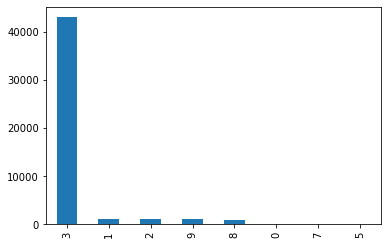

In [95]:
predictions_df['code_y'].value_counts().plot(kind='bar')

In [96]:
#group by the uuid
predictions_df1 = predictions_df.groupby(['uuid'], as_index=False)['code_y'].count()

#then analyse the perusasive tools that people use 

In [97]:
print(predictions_df1)

                                    uuid  code_y
0     C_000684deee244f2db5a9c681d15d7c50       2
1     C_000ea2a2fc014f65af5188a98bfb5d04       8
2     C_0020dee073a945eb82a128f656cff94b      11
3     C_003cddce8479461c915a9a8a1afbbe40       5
4     C_004ae9e50f4a4e2d8822823056edaf1e      14
...                                  ...     ...
5176  C_ffdbd54cb66143189eeb41d2b4947aae      26
5177  C_fff1a09cf0a544e089d156648b1370da       1
5178  C_fff8c18fa78946afb3149e96e6a9f770      10
5179  C_fffebb7b5cc0439b80877047ac5f900d      17
5180  C_ffffd50827bf42959ff89f6f43917ed2      10

[5181 rows x 2 columns]


In [98]:
predictions_df1 = pd.DataFrame(predictions_df1)

In [99]:
predictions_df1.to_csv('predictions1.csv', index=False)